<a href="https://colab.research.google.com/github/s4ki3f/muzzle_detector_app/blob/main/muzzle_detection_yolov8_to_TFlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [2]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 83.9MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 165k/165k [00:00<00:00, 7.56MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 62.1ms
Speed: 12.0ms preprocess, 62.1ms inference, 261.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LBLyC3MJnNhkwTi9uIAR")
project = rf.workspace("null-tttt4").project("muzzle-detector")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d3b362c7cfe4710de53ff261851b744a9aff516d7d022e14ef007f17cd5d8cde
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to muzzle-detector-1 in yolov8:: 100%|██████████| 667/667 [00:00<00:00, 1597.64it/s]


In [ ]:
!yolo train model=yolov8n.pt data=/content/muzzle-detector-1/data.yaml epochs=3 imgsz=640

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/muzzle-detector-1/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fal

In [ ]:
!yolo train model=yolov8n.pt data=/content/muzzle-detector-1/data.yaml epochs=500 imgsz=640

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/muzzle-detector-1/data.yaml, epochs=500, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=F

In [ ]:
!yolo train model=yolov8n.pt data=/content/muzzle-detector-1/data.yaml epochs=500 imgsz=640 patience=0

Ultralytics YOLOv8.0.78 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/muzzle-detector-1/data.yaml, epochs=500, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

In [ ]:
!yolo export model=yolov8n.pt format=tflite

In [5]:
!yolo predict task=detect model=/content/muzzle_detection.tflite imgsz=640 source=/content/muzzle-detector-1/test/images/20221003_114826_jpg.rf.5f76ee4e1a08c63a0ae260d281aae012.jpg

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/muzzle_detection.tflite for TensorFlow Lite inference...
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.

image 1/1 /content/muzzle-detector-1/test/images/20221003_114826_jpg.rf.5f76ee4e1a08c63a0ae260d281aae012.jpg: 640x640 1 unusable, 261.6ms
Speed: 36.2ms preprocess, 261.6ms inference, 101.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [ ]:
!yolo export model=/content/runs/detect/train2/weights/best.pt format=tflite

In [ ]:
!yolo predict task=detect model=/content/runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=640 source=/content/muzzle-detector-1/test/images/20221003_114826_jpg.rf.5f76ee4e1a08c63a0ae260d281aae012.jpg

In [ ]:
!yolo export model=/content/runs/detect/train3/weights/best.pt format=tflite

In [ ]:
!yolo predict task=detect model=/content/runs/detect/train3/weights/best_saved_model/best_float32.tflite imgsz=640 source=/content/muzzle-detector-1/test/images/20221003_114826_jpg.rf.5f76ee4e1a08c63a0ae260d281aae012.jpg

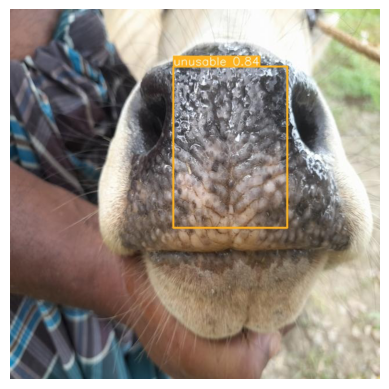

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('/content/runs/detect/predict2/20221003_114826_jpg.rf.5f76ee4e1a08c63a0ae260d281aae012.jpg')

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off the axis
plt.show()
